In [ ]:
# Evento 
#100142 : agenda
#200142: borrado 
#142: cancelaciones (bajas)

In [2]:
# Load kedro environment (not needed in .py)
from pathlib import Path
from kedro.framework.context import load_context
import numpy as np

# Load a context to be able to work in the notebook
#current_dir = Path.cwd()
current_dir = Path("/u01/share/cesar/aa_engine_uy/notebooks/")
proj_path = current_dir.parent
context = load_context(proj_path)
catalog = context.catalog
credentials = context.config_loader.get("credentials*","credentials*/**")
parameters = context.config_loader.get("parameters*","parameters*/**")

In [3]:
plan_evento_connect=catalog.load("plan_evento")

2020-12-15 15:50:27,657 - kedro.io.data_catalog - INFO - Loading data from `plan_evento` (SQLPartitionedDataSet)...


In [4]:
plan_evento=plan_evento_connect.filter_by_query("select * from stg_uy_plan_evento")

/u01/miniconda3/envs/uypo37/lib/python3.7/site-packages/sqlalchemy/dialects/oracle/base.py:1381: SAWarning: Oracle version (19, 5, 0, 0, 0) is known to have a maximum identifier length of 128, rather than the historical default of 30. SQLAlchemy 1.4 will use 128 for this database; please set max_identifier_length=128 in create_engine() in order to test the application with this new length, or set to 30 in order to assure that 30 continues to be used.  In particular, pay close attention to the behavior of database migrations as dynamically generated names may change. See the section 'Max Identifier Lengths' in the SQLAlchemy Oracle dialect documentation for background.
  % ((self.server_version_info,))


In [5]:
plan_evento.head()

,CUSTOMER_ID,EVENTO_ID,EVENTO,PRODUCTO_ID,PRODUCTO,PROD_CATEGORY_ID,PROD_CATEGORY,FECHA,REASON,DATE_EXP
0,211998,142,Cancel Product,128,IRD High Definition,5,Hardware,2020-02-01 00:08:52,28.0,202002
1,211998,142,Cancel Product,129,FOX+ High Definition,1,Premium,2020-02-01 00:08:51,28.0,202002
2,211998,142,Cancel Product,130,HBO Max - High Definition,1,Premium,2020-02-01 00:08:51,28.0,202002
3,211998,142,Cancel Product,134,DIRECTV ORO HD DVR,3,Basico,2020-02-01 00:08:51,28.0,202002
4,211998,142,Cancel Product,138,ADULT PACK,1,Premium,2020-02-01 00:08:52,28.0,202002


In [6]:
plan_evento.groupby(["DATE_EXP"]).agg({'CUSTOMER_ID':'nunique'})

,CUSTOMER_ID
DATE_EXP,
202001,17836
202002,17033
202012,11720


In [7]:
plan_evento.groupby(["DATE_EXP","PRODUCTO"]).agg({'CUSTOMER_ID':'nunique'}).reset_index().sort_values(['CUSTOMER_ID'],ascending=False)

,DATE_EXP,PRODUCTO,CUSTOMER_ID
26,202001,IRD HD ONLY,7167
75,202002,IRD HD ONLY,6960
22,202001,HBO Max - High Definition,6018
70,202002,HBO Max - High Definition,5431
3,202001,DIRECTV ORO HD ONLY,5414
...,...,...,...
58,202002,DTVLA-Town Hall,1
10,202001,FORMAN,1
68,202002,Freeview Terror,1
71,202002,HBO and Cinemax,1


In [9]:
plan_evento.groupby(["DATE_EXP","PROD_CATEGORY_ID","PROD_CATEGORY"]).agg({'CUSTOMER_ID':'nunique'}).reset_index().sort_values(['CUSTOMER_ID'],ascending=False)

,DATE_EXP,PROD_CATEGORY_ID,PROD_CATEGORY,CUSTOMER_ID
0,202001,1,Premium,13641
4,202002,1,Premium,13207
1,202001,3,Basico,8832
5,202002,3,Basico,8580
2,202001,5,Hardware,8500
6,202002,5,Hardware,8253
3,202001,6,Otros,3768
7,202002,6,Otros,3604


In [11]:
plan_evento.groupby(["DATE_EXP","EVENTO_ID","EVENTO"]).agg({'CUSTOMER_ID':'nunique'}).reset_index().sort_values(['CUSTOMER_ID'],ascending=False)

,DATE_EXP,EVENTO_ID,EVENTO,CUSTOMER_ID
4,202001,142,Cancel Product,5406
11,202001,100142,Schedule Product Cancellation,5045
21,202002,142,Cancel Product,4654
28,202002,100142,Schedule Product Cancellation,4611
19,202002,120,Order Product for Customer,4576
2,202001,120,Order Product for Customer,4502
26,202002,5229,Activate Product,4317
9,202001,5229,Activate Product,4196
23,202002,171,Reconnect a Disconnected Product,2404
6,202001,171,Reconnect a Disconnected Product,2036


In [18]:
plan_evento["DATE"]=plan_evento.FECHA.dt.date

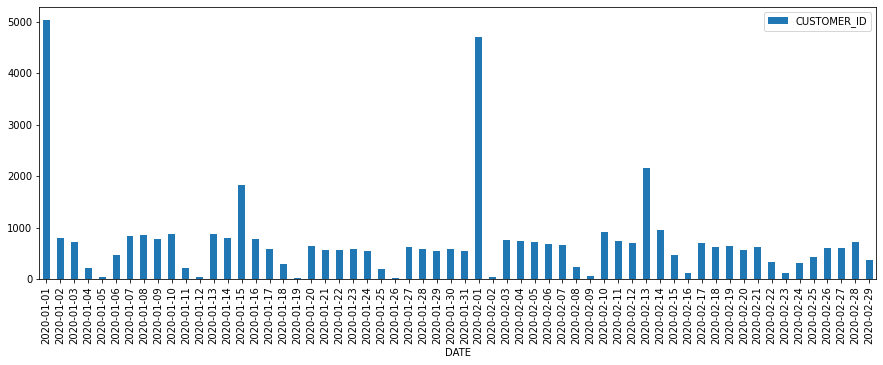

In [23]:
plan_evento.groupby(["DATE"]).agg({'CUSTOMER_ID':'nunique'}).plot(kind='bar',figsize=(15,5))

In [7]:
#Cantidad de eventos 142
plan_evento.loc[plan_evento.EVENTO_ID==142].groupby(["DATE_EXP"]).agg({'CUSTOMER_ID':'nunique'}).reset_index().sort_values(['CUSTOMER_ID'],ascending=False)

,DATE_EXP,CUSTOMER_ID
0,202001,5406
2,202012,4995
1,202002,4654
